In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from a2_utils import *
from UZ_utils import *
import os

# Exercise 1: Convolution

### (a) Compute the convolution between the signal and kernel below \(k * f\) by hand.
#### f = [0, 1, 1, 1, 0, 0.7, 0.5, 0.2, 0, 0, 1, 0], k = [0.5, 1, 0.3]


In [2]:
f = np.array([0, 1, 1, 1, 0, 0.7, 0.5, 0.2, 0, 0, 1, 0])
k = np.array([0.5, 1, 0.3])
k = np.flip(k)

n = int((len(k)-1)/2)
big_f = np.pad(f, (n, n), mode='constant', constant_values=0)
bf_len = len(big_f)
I = np.zeros(bf_len)
for i in range(n, bf_len - n):
    for j in range(-n, n+1):
        I[i] += big_f[i+j]*k[j+n]

res = I[n:-n]


In [3]:
print(res)

[0.5  1.5  1.8  1.3  0.65 0.95 0.81 0.35 0.06 0.5  1.   0.3 ]


### (b) Implement the function simple_convolution that uses a 1-D signal I and a kernel k of size 2N + 1. The function should return the convolution between the two.

In [4]:
def simple_convolution(f, ker):
    k = np.flip(ker)
    n = int((len(k)-1)/2)
    f_len = len(f)
    I = np.zeros(f_len)    
    for i in range(n, f_len - n):
        I[i] += np.dot(f[i-n:i+n+1],k)

    return I[n:f_len-n]

In [5]:
signal = read_data('signal.txt')
print(signal)
kernel = read_data('kernel.txt')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 1. 1. 1. 1. 1. 5. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
my_result = simple_convolution(signal, kernel)
kernel = kernel.reshape(-1, 1) 
conv_result = cv2.filter2D(signal, -1, kernel)

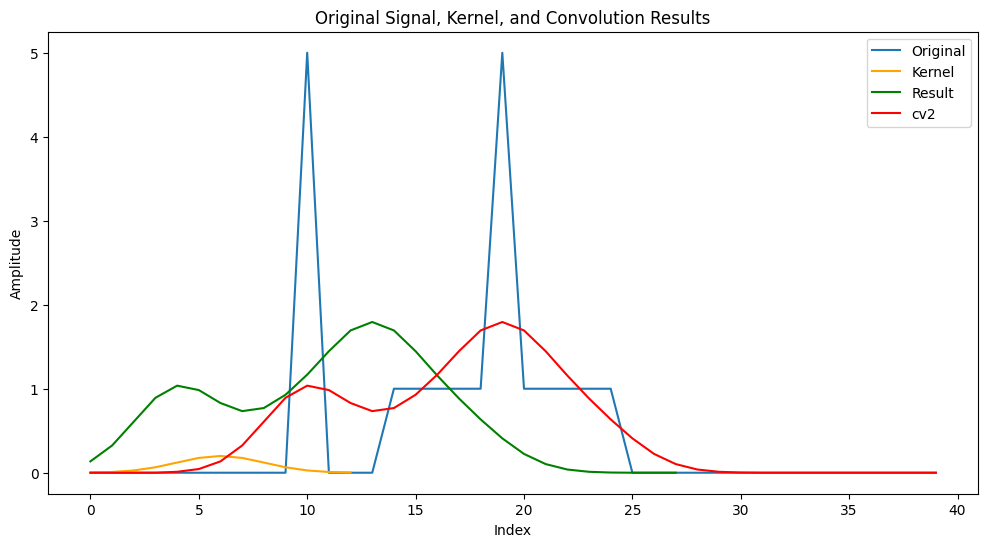

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(signal, label="Original")
plt.plot(kernel, label="Kernel", color="orange") 
plt.plot(my_result, label="Result", color="green")
plt.plot(conv_result, label="cv2", color="red")

plt.title("Original Signal, Kernel, and Convolution Results")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### (c) Improve the function simple_convolution by also addressing the edges of the signal. 

In [8]:
def simple_convolution_zeros(f, ker):
    k = np.flip(ker)
    n = int((len(k)-1)/2)
    big_f = np.pad(f, (n, n), mode='constant', constant_values=0)
    bf_len = len(big_f)
    I = np.zeros(bf_len)
    for i in range(n, bf_len - n):
        for j in range(-n, n+1):
            I[i] += big_f[i+j]*k[j+n]


    return I[n:-n]

In [9]:
def simple_convolution_mirror(f, k):
    n = int((len(k)-1)/2)
    k = np.flip(k)
    bf = []
    for i in range(n, 0, -1):
        bf.append(f[i])
    for i in range(len(f)):
        bf.append(f[i])
    for i in range(len(f) - 2, len(f) - n - 2, -1):
        bf.append(f[i])
        
    bf_len = len(bf)
    I = np.zeros(bf_len)

    bf = np.array(bf).flatten()
    k = np.array(k).flatten()
    
    for i in range(n, bf_len - n):
        for j in range(-n, n+1):
            I[i] += float(bf[i + j]) * float(k[j + n])

    return I[n:-n]

In [10]:
my_result2 = simple_convolution_mirror(signal, kernel)

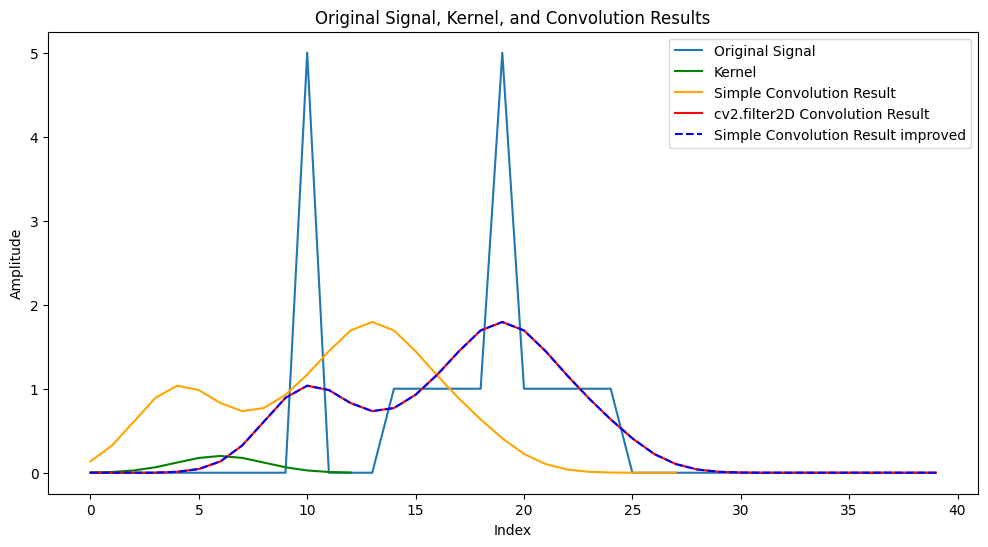

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(signal, label="Original Signal")
plt.plot(kernel, label="Kernel", color="green") 
plt.plot(my_result, label="Simple Convolution Result", color="orange")
plt.plot(conv_result, label="cv2.filter2D Convolution Result", color="red")
plt.plot(my_result2, label="Simple Convolution Result improved", color="blue", linestyle="--")


plt.title("Original Signal, Kernel, and Convolution Results")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

### (d)  Write a function gauss(sigma) that calculates a Gaussian kernel.

In [12]:
def gauss(sigma):
    size = int(2 * np.ceil(3 * sigma) + 1)
    g = []

    for i in range(size):
        x = i - (size - 1) / 2 
        value = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x**2) / (2 * sigma**2))
        g.append(value)
        
    g = np.array(g)  
    return g / np.sum(g) 

In [13]:
g05 = gauss(0.5)
g1 = gauss(1)
g2 = gauss(2)
g3 = gauss(3)
g4 = gauss(4)

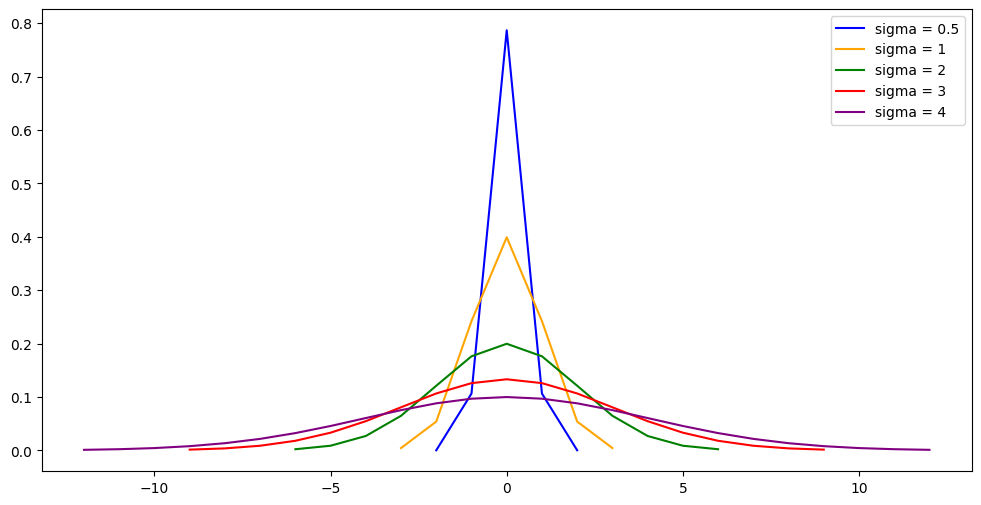

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(-np.ceil(3 * 0.5),np.ceil(3 * 0.5), len(g05)), g05, label="sigma = 0.5", color="blue")
plt.plot(np.linspace(-np.ceil(3),np.ceil(3), len(g1)), g1, label="sigma = 1", color="orange")
plt.plot(np.linspace(-np.ceil(3 * 2),np.ceil(3 * 2), len(g2)), g2, label="sigma = 2", color="green")
plt.plot(np.linspace(-np.ceil(3 * 3),np.ceil(3 * 3), len(g3)), g3, label="sigma = 3", color="red")
plt.plot(np.linspace(-np.ceil(3 * 4),np.ceil(3 * 4), len(g4)), g4, label="sigma = 4", color="purple")

plt.legend()
plt.show()

### (e)

In [15]:
k1 = g2
k2 = np.array([0.1, 0.6, 0.4])
k3 = simple_convolution_mirror(k1, k2)

In [16]:
con1 = simple_convolution_mirror(signal, k1)
con2 = simple_convolution_mirror(signal, k2)
con12 = simple_convolution_mirror(con1, k2)
con21 = simple_convolution_mirror(con2, k1)
con3 = simple_convolution_mirror(signal, k3)

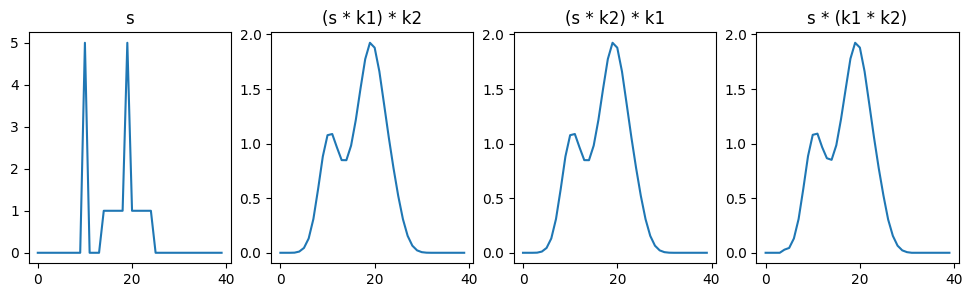

In [17]:
plt.figure(figsize=(12, 3))
plt.subplot(1,4,1) 
plt.plot(signal)
plt.title("s")
plt.subplot(1,4,2) 
plt.plot(con12)
plt.title("(s * k1) * k2")
plt.subplot(1,4,3) 
plt.plot(con21)
plt.title("(s * k2) * k1")
plt.subplot(1,4,4) 
plt.plot(con3)
plt.title("s * (k1 * k2)")

plt.show()

# Exercise 2: Image filtering

### (a) Write a function gaussfilter that generates a Gaussian filter and applies it to a 2-D image. 

In [18]:
def gaussfilter(image, sigma):

    kernel = gauss(sigma)

    image1 = cv2.filter2D(image, -1, kernel)

    image2 = cv2.filter2D(image1.T, -1, kernel)

    return image2.T
        
    

In [19]:
lena = imread_gray('images/lena.png')

In [20]:
lena_gauss_noise = gauss_noise(lena)
lena_sp_noise = sp_noise(lena)

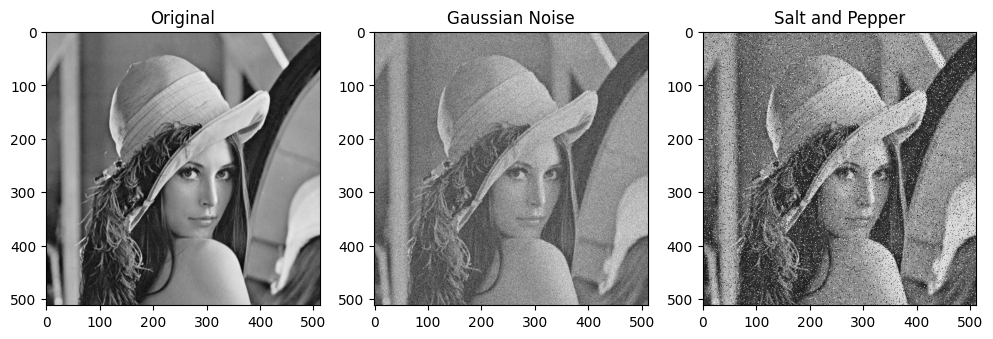

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1,3,1) 
plt.imshow(lena, cmap="gray")
plt.title('Original') 
plt.subplot(1,3,2)
plt.imshow(lena_gauss_noise, cmap="gray")
plt.title('Gaussian Noise')
plt.subplot(1,3,3)
plt.imshow(lena_sp_noise, cmap="gray")
plt.title('Salt and Pepper')
plt.show()

In [22]:
lgf = gaussfilter(lena_gauss_noise, 2)

In [23]:
lsf = gaussfilter(lena_sp_noise, 2)

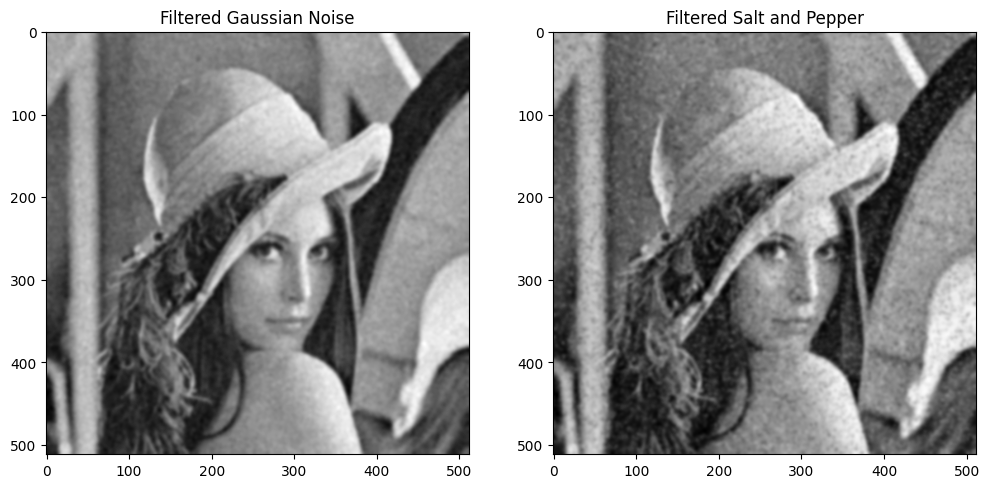

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(lgf, cmap="gray")
plt.title('Filtered Gaussian Noise')
plt.subplot(1,2,2)
plt.imshow(lsf, cmap="gray")
plt.title('Filtered Salt and Pepper')
plt.show()

### (b) Convolution can also be used for image sharpening. Look at its definition in the lecture slides and implement it. Test it on the image from file museum.jpg.

In [25]:
museum = imread_gray('images/museum.jpg')

In [26]:
def sharping(image, n):
    
    image2 = gaussfilter(image, n)
    result = 2*image - image2
    result[result < 0] = 0 
    result[result > 1] = 1 
    
    return result

In [27]:
sharp_museum = sharping(museum, 4)


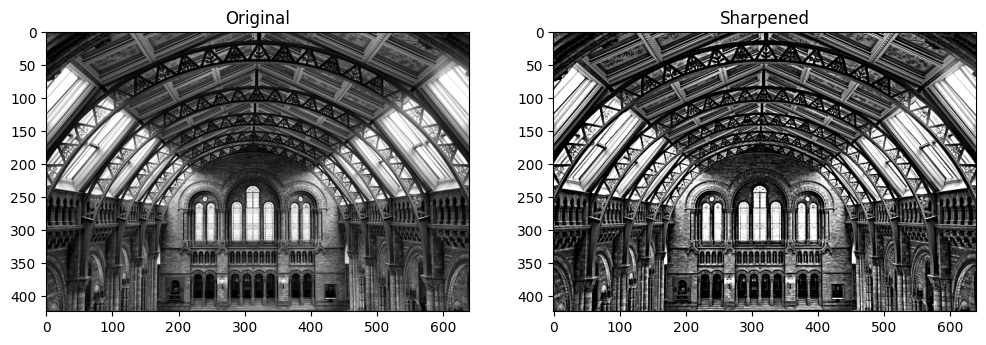

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(museum, cmap="gray")
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(sharp_museum, cmap="gray")
plt.title('Sharpened')
plt.show()

### (c) Implement a nonlinear median filter. 

In [29]:
def find_median(arr):
    n=len(arr)
    arr_sorted = sorted(arr)
    return arr_sorted[n // 2]

def simple_median(I, w):
    
    n = int((w-1)/2)
    res = np.zeros(len(I))
    for i in range(len(I)):
        if i-n>=0 and i+n<len(I):
            x = I[i-n:i+n+1]
        elif i-n<0:
            x = I[0:i+n+1]
        else:
            x = I[i-n:len(I)]
            
        m = find_median(x)
        res[i] = m
            
    return res



In [30]:
my_signal = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
my_signal_cor = np.array([0,0,3,0,0,3,0,0,0,0,0,1,1,1,3,0,1,1,1,1,0,0,0,0,0,0,3,3,0,0,3,0,0,0,0,0,0,0,3,0])
cor2 = my_signal.copy()
cor2[np.random.rand(my_signal.shape[0]) < 0.1] = 1
cor2[np.random.rand(my_signal.shape[0]) < 0.1] = 0
g2 = gauss(2)
sig_gauss = simple_convolution_mirror(my_signal_cor, g2)
sig_med = simple_median(my_signal_cor,7)

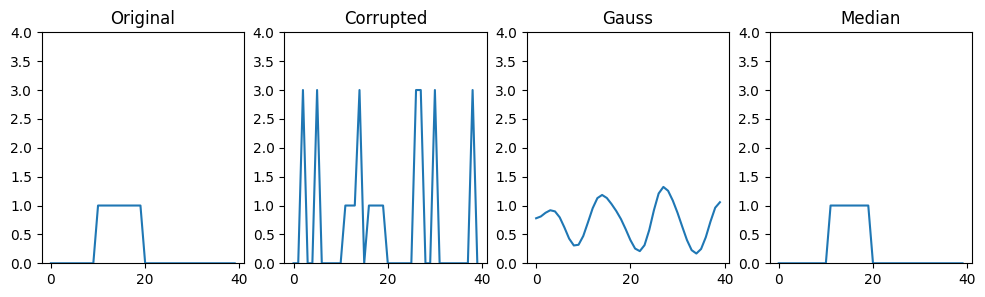

In [31]:
plt.figure(figsize=(12, 3))
plt.subplot(1,4,1)
plt.plot(my_signal)
plt.title("Original")
plt.ylim(0, 4)
plt.subplot(1,4,2) 
plt.plot(my_signal_cor)
plt.title("Corrupted")
plt.ylim(0, 4)
plt.subplot(1,4,3) 
plt.plot(sig_gauss)
plt.title("Gauss")
plt.ylim(0, 4)
plt.subplot(1,4,4) 
plt.plot(sig_med)
plt.title("Median")
plt.ylim(0, 4)
plt.show()

In [32]:
sig_gauss = simple_convolution_mirror(cor2, g2)
sig_med = simple_median(cor2,5)

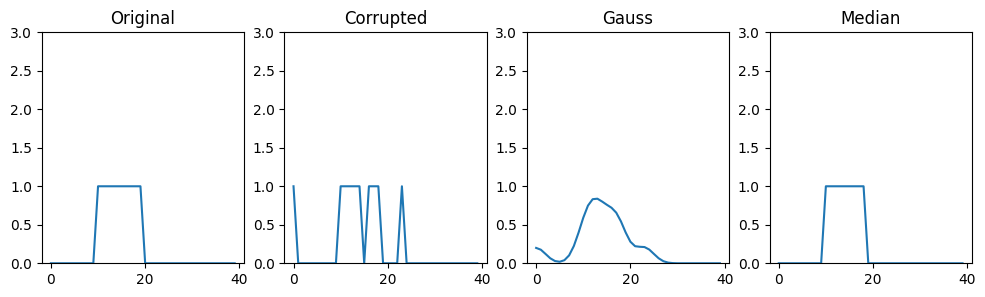

In [33]:
plt.figure(figsize=(12, 3))
plt.subplot(1,4,1)
plt.plot(my_signal)
plt.title("Original")
plt.ylim(0, 3)
plt.subplot(1,4,2) 
plt.plot(cor2)
plt.title("Corrupted")
plt.ylim(0, 3)
plt.subplot(1,4,3) 
plt.plot(sig_gauss)
plt.title("Gauss")
plt.ylim(0, 3)
plt.subplot(1,4,4) 
plt.plot(sig_med)
plt.title("Median")
plt.ylim(0, 3)
plt.show()

### (d) Implement a 2-D version of the median filter.

In [34]:
def median_filter(image, w):

    n = int((w-1)/2)
    res = np.zeros((image.shape[0],image.shape[1]))

    for i in range(image.shape[0]):  
        for j in range(image.shape[1]):

            if (i-n) >= 0 and (j-n) >= 0 and (i+n) < image.shape[0] and (j+n) < image.shape[1]:
                x = image[i-n:i+n+1, j-n:j+n+1]
            elif (i-n) < 0:
                if (j-n) >= 0:
                    x = image[0:i+n+1, j-n:j+n+1] 
                else:
                    x = image[0:i+n+1, 0:j+n+1] 
            elif (i+n) >= image.shape[0]:
                if (j-n) >= 0:
                    x = image[i-n:image.shape[0], j-n:j+n+1] 
                else:
                    x = image[i-n:image.shape[0], 0:j+n+1]  
            elif (j-n) < 0:
                if (i-n) >= 0:
                    x = image[i-n:i+n+1, 0:j+n+1]  
                else:
                    x = image[0:i+n+1, 0:j+n+1] 
            elif (j+n) >= image.shape[1]:
                if (i-n) >= 0:
                    x = image[i-n:i+n+1, j-n:image.shape[1]] 
                else:
                    x = image[0:i+n+1, j-n:image.shape[1]]  

            x = x.reshape(-1)
            res[i, j] = find_median(x) 
    return res
    

In [35]:
lena_gauss_median = median_filter(lena_gauss_noise, 3)
lena_sp_median = median_filter(lena_sp_noise, 3)

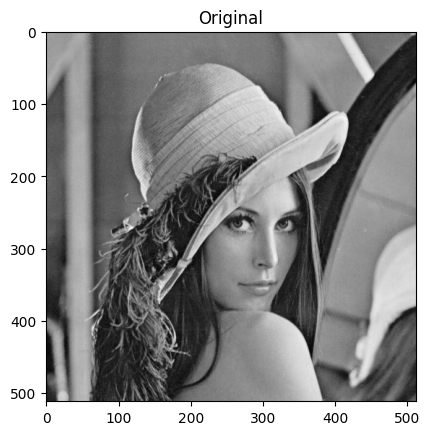

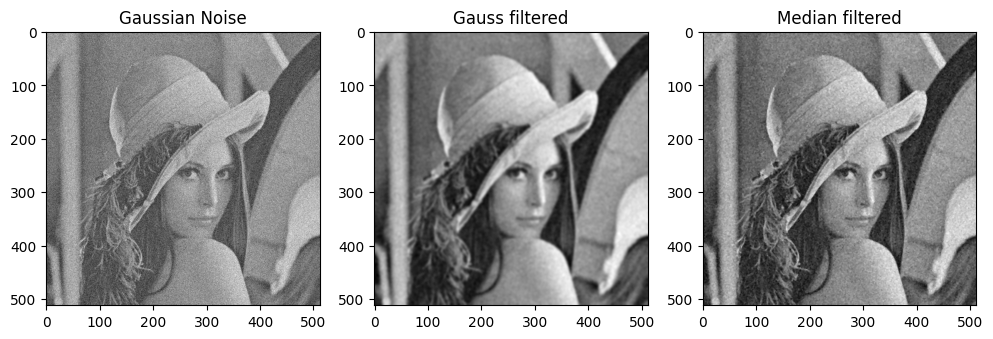

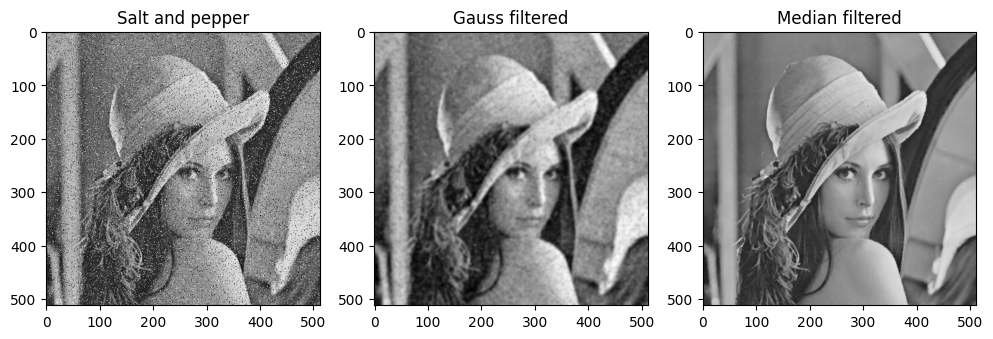

In [36]:
plt.imshow(lena, cmap="gray")
plt.title("Original")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
plt.imshow(lena_gauss_noise, cmap="gray")
plt.title('Gaussian Noise')
plt.subplot(1,3,2) 
plt.imshow(lgf, cmap="gray")
plt.title('Gauss filtered') 
plt.subplot(1,3,3)
plt.imshow(lena_gauss_median, cmap="gray")
plt.title('Median filtered')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
plt.imshow(lena_sp_noise, cmap="gray")
plt.title('Salt and pepper')
plt.subplot(1,3,2) 
plt.imshow(lsf, cmap="gray")
plt.title('Gauss filtered') 
plt.subplot(1,3,3)
plt.imshow(lena_sp_median, cmap="gray")
plt.title('Median filtered')
plt.show()

### (e) Implement the hybrid image merging that was presented at the lectures

In [37]:
def laplacian_filter(image, n):
    smoothed_image = gaussfilter(image, n) 
    laplacian_image = image - smoothed_image
    
    return laplacian_image

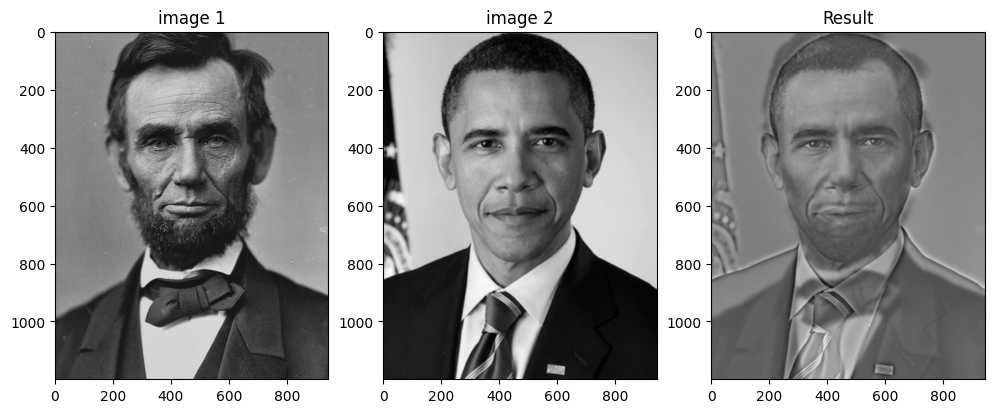

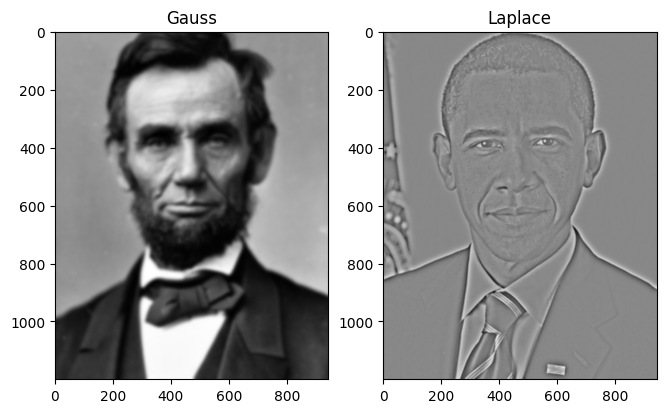

In [38]:
obama = imread_gray('images/obama.jpg')
obama_lap = laplacian_filter(obama, 10)
lincoln = imread_gray('images/lincoln.jpg')
lincol_gauss = gaussfilter(lincoln, 5)
hybrid = 0.4*lincol_gauss + 0.6*obama_lap

plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
plt.imshow(lincoln, cmap="gray")
plt.title('image 1')
plt.subplot(1,3,2)
plt.imshow(obama, cmap="gray")
plt.title('image 2')
plt.subplot(1,3,3)
plt.imshow(hybrid, cmap="gray")
plt.title('Result')
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
plt.imshow(lincol_gauss, cmap="gray")
plt.title('Gauss')
plt.subplot(1,3,2)
plt.imshow(obama_lap, cmap="gray")
plt.title('Laplace')
plt.show()

# Exercise 3: Global approach to image description

### (a)  Implement the function myhist3 that computes a 3-D histogram from a three channel image.

In [39]:
def myhist3(image, n_bins): 

    height, width, channels = image.shape
    part = 255//n_bins
    mod = 255 % n_bins
    H = np.zeros((n_bins,n_bins,n_bins))

    for i in range(height):   
        for j in range(width):     
           
            r, g, b = image[i, j] 
            r1 = 0
            g1 = 0
            b1 = 0
            r1 = r//part
            g1 = g//part
            b1 = b//part

            if r1>=n_bins:
                r1 = n_bins - 1
            if g1>=n_bins:
                g1 = n_bins - 1
            if b1>=n_bins:
                b1 = n_bins - 1
            
            H[r1,g1,b1] += 1
            
    return H / np.sum(H)



### (b) Implement a function compare_histograms that accepts two histograms and a string that identifies the distance measure you wish to calculate.

In [40]:
def compare_histograms(H1, H2, measure:str):

    distance = 0
    if measure == "L2":
        difference = (H1 - H2) ** 2
        distance = np.sqrt(np.sum(difference))
    elif measure == "X2":
        e = 1e-10
        difference = (H1 - H2) ** 2
        sum = H1 + H2 + e
        distance = 0.5 * np.sum((difference / sum))
    elif measure == "I":
        minimum = np.minimum(H1, H2)
        distance = 1 - np.sum(minimum)
    elif measure == "H":
        sqrt_H1 = np.sqrt(H1)
        sqrt_H2 = np.sqrt(H2)
        difference = (sqrt_H1 - sqrt_H2)**2
        distance = np.sqrt(0.5 * np.sum(difference))
        
    return round(distance,3)
    

### (c)  Test your function

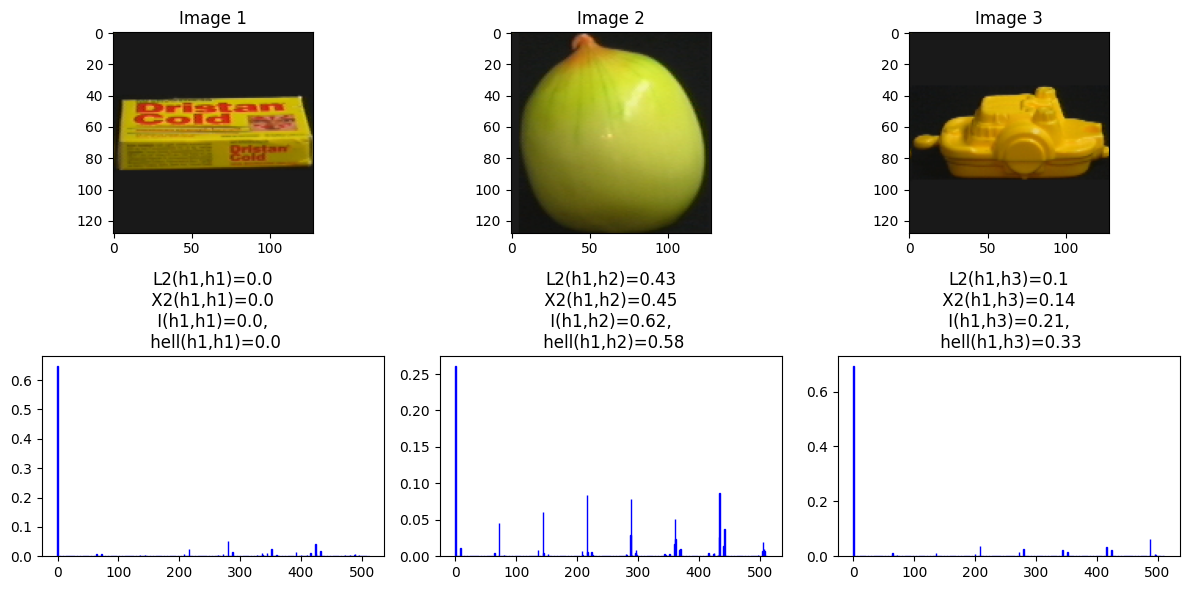

In [42]:
obj1 = cv2.imread("dataset/object_01_1.png")  
obj1 = cv2.cvtColor(obj1, cv2.COLOR_BGR2RGB)
obj2 = cv2.imread("dataset/object_02_1.png")  
obj2 = cv2.cvtColor(obj2, cv2.COLOR_BGR2RGB)
obj3 = cv2.imread("dataset/object_03_1.png")  
obj3 = cv2.cvtColor(obj3, cv2.COLOR_BGR2RGB)


H1 = myhist3(obj1, 8)
H2 = myhist3(obj2, 8)
H3 = myhist3(obj3, 8)

l11 = compare_histograms(H1,H1,"L2")
l12 = compare_histograms(H1,H2,"L2")
l13 = compare_histograms(H1,H3,"L2")

hell11 = compare_histograms(H1,H1,"H")
hell12 = compare_histograms(H1,H2,"H")
hell13 = compare_histograms(H1,H3,"H")

x11 = compare_histograms(H1,H1,"X2")
x12 = compare_histograms(H1,H2,"X2")
x13 = compare_histograms(H1,H3,"X2")

i11 = compare_histograms(H1,H1,"I")
i12 = compare_histograms(H1,H2,"I")
i13 = compare_histograms(H1,H3,"I")

H11d = H1.reshape(-1)
H21d = H2.reshape(-1)
H31d = H3.reshape(-1)
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

axes[0, 0].imshow(obj1)
axes[0, 0].set_title("Image 1")

axes[0, 1].imshow(obj2)
axes[0, 1].set_title("Image 2")

axes[0, 2].imshow(obj3, cmap='viridis')
axes[0, 2].set_title("Image 3")

axes[1, 0].bar(range(len(H11d)), H11d, edgecolor='blue')
axes[1, 0].set_title(f"L2(h1,h1)={round(l11,2)}\n X2(h1,h1)={round(x11,2)} \n I(h1,h1)={round(i11,2)}, \n hell(h1,h1)={round(hell11,2)}")

axes[1, 1].bar(range(len(H21d)), H21d, edgecolor='blue')
axes[1, 1].set_title(f"L2(h1,h2)={round(l12,2)}\n X2(h1,h2)={round(x12,2)} \n I(h1,h2)={round(i12,2)}, \n hell(h1,h2)={round(hell12,2)}")

axes[1, 2].bar(range(len(H31d)), H31d, edgecolor='blue')
axes[1, 2].set_title(f"L2(h1,h3)={round(l13,2)}\n X2(h1,h3)={round(x13,2)} \n I(h1,h3)={round(i13,2)}, \n hell(h1,h3)={round(hell13,2)}")

plt.tight_layout()
plt.show()



### (d) Write a function that will accept the path to the image directory and the parameter n_bins and then calculate RGB histograms for all images in the directory as well as transform them to 1-D arrays.

In [43]:
def histograms(directory, n_bins):
    hists = {}
    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        H = myhist3(image, n_bins)
        hists[image_path] = H
    return hists

In [44]:
def  image_retrieval(directory, image, n_bins, napaka):
    hists = histograms(directory, n_bins)
    H = myhist3(image, n_bins)

    errors = {}

    for image_path, hist in hists.items():
        e = compare_histograms(H,hist,napaka)
        errors[image_path] = e

    return errors, hists
        
        

In [45]:
def ret_5(directory, image, n_bins, napaka):
    errors, hists = image_retrieval(directory, image, n_bins, napaka)
    sorted_errors = dict(sorted(errors.items(), key=lambda item: item[1]))
    errors5 = {}
    hists5 = {}
    i = 0
    for image_path, err in sorted_errors.items():
        errors5[image_path] = err
        hists5[image_path] = hists[image_path]
        i+=1

        if i == 6:
            break
    return errors5, hists5

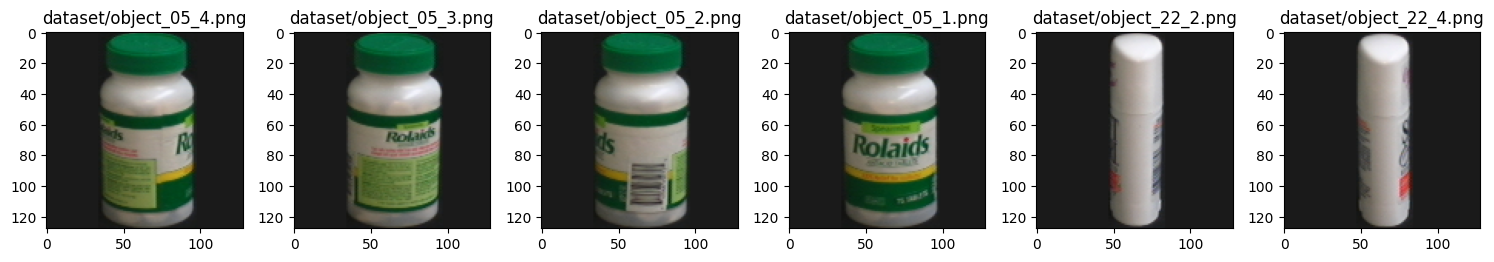

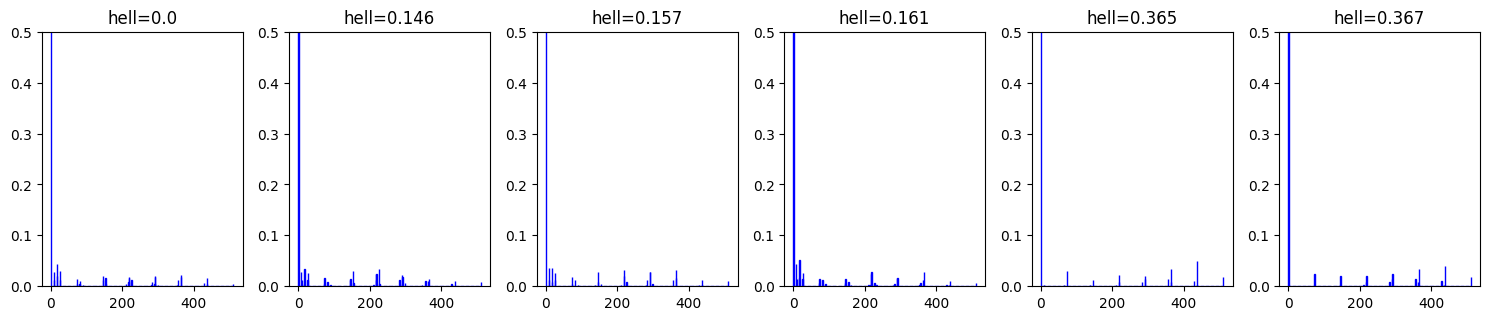

In [46]:
image = cv2.imread("dataset/object_05_4.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

err, hists = ret_5("dataset/", image, 8,"H")
err2 = err

plt.figure(figsize=(15, 10)) 
for idx, (image_path, e) in enumerate(err.items()):
    img = cv2.imread(image_path)
    plt.subplot(1, 6, idx+1) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    plt.title(image_path)
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6)) 
for idx, (image_path, e) in enumerate(err.items()):
    hist = hists[image_path]
    plt.subplot(2, 6, idx+7) 
    H = hist.reshape(-1)
    plt.bar(range(len(H)), H, edgecolor='blue')
    plt.ylim(0, 0.5)
    plt.title(f"hell={e}")
    
plt.tight_layout()
plt.show()


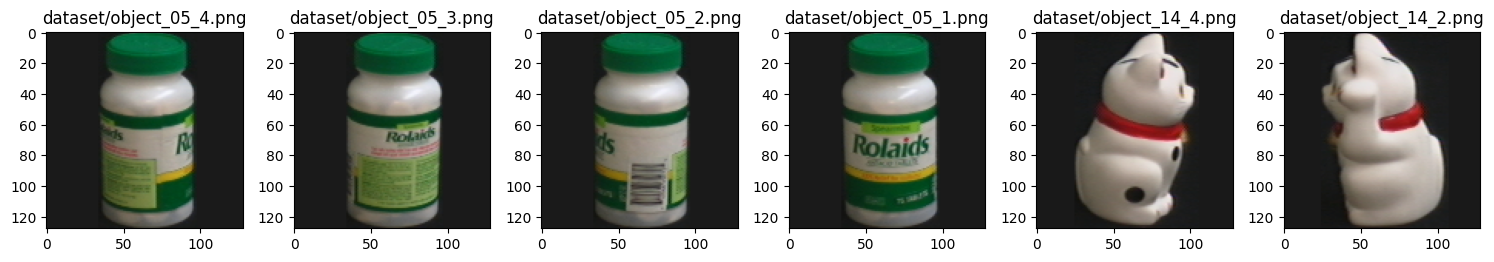

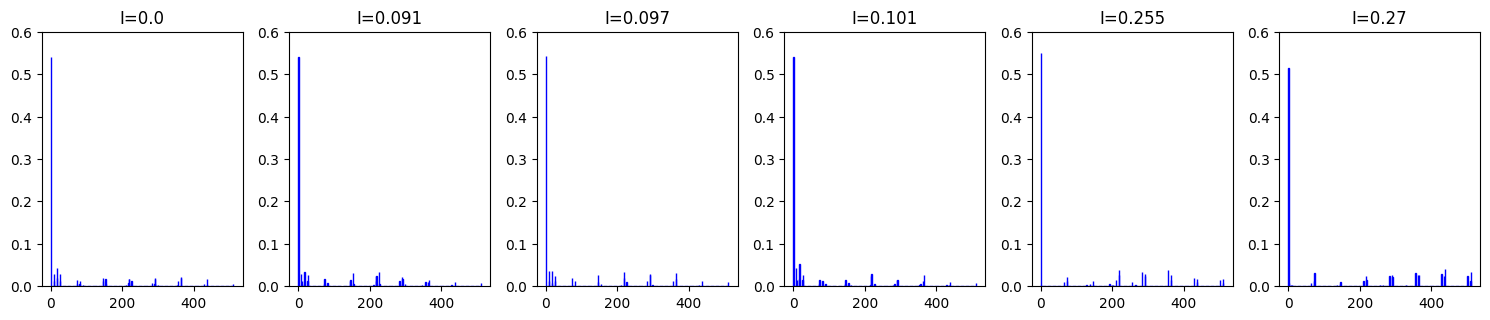

In [47]:
err, hists = ret_5("dataset/", image, 8, "I")
err2 = err

plt.figure(figsize=(15, 10)) 
for idx, (image_path, e) in enumerate(err.items()):
    img = cv2.imread(image_path)
    plt.subplot(1, 6, idx+1) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    plt.title(image_path)
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6)) 
for idx, (image_path, e) in enumerate(err.items()):
    hist = hists[image_path]
    plt.subplot(2, 6, idx+7) 
    H = hist.reshape(-1)
    plt.bar(range(len(H)), H, edgecolor='blue')
    plt.ylim(0, 0.6)
    plt.title(f"I={e}")
    
plt.tight_layout()
plt.show()

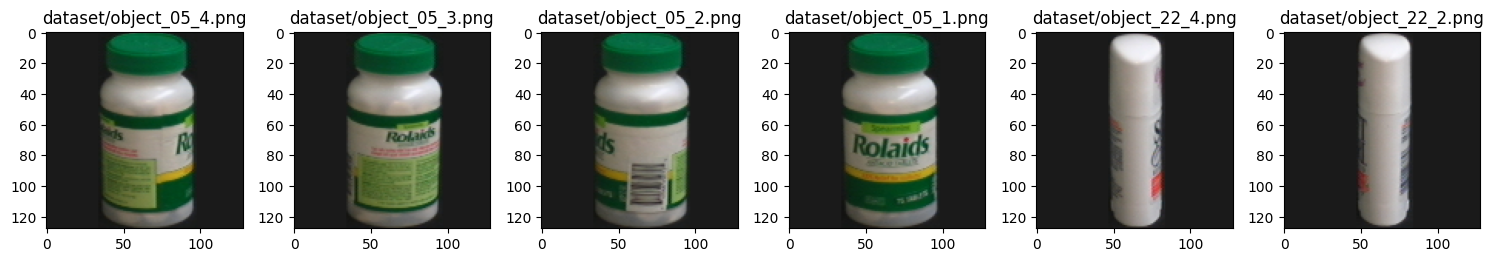

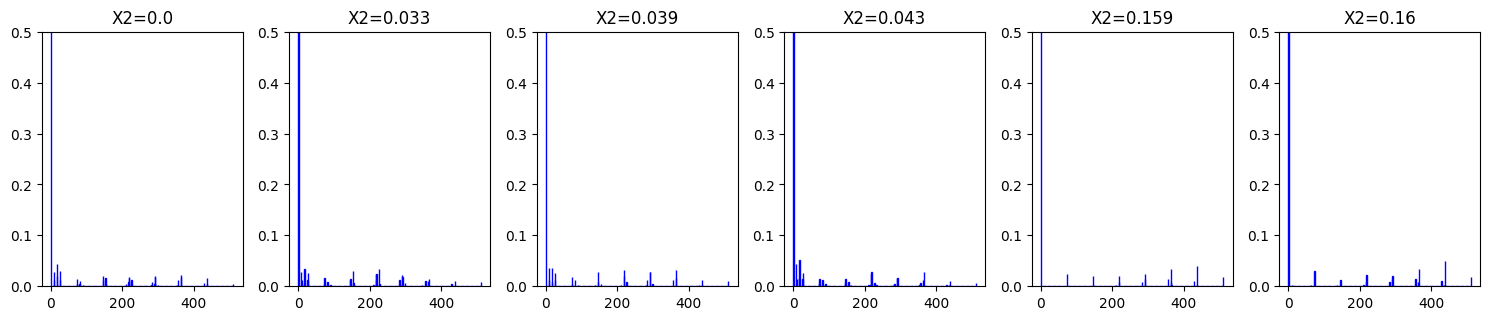

In [48]:
err, hists = ret_5("dataset/", image, 8, "X2")
err2 = err

plt.figure(figsize=(15, 10)) 
for idx, (image_path, e) in enumerate(err.items()):
    img = cv2.imread(image_path)
    plt.subplot(1, 6, idx+1) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    plt.title(image_path)
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6)) 
for idx, (image_path, e) in enumerate(err.items()):
    hist = hists[image_path]
    plt.subplot(2, 6, idx+7) 
    H = hist.reshape(-1)
    plt.bar(range(len(H)), H, edgecolor='blue')
    plt.ylim(0, 0.5)
    plt.title(f"X2={e}")
    
plt.tight_layout()
plt.show()

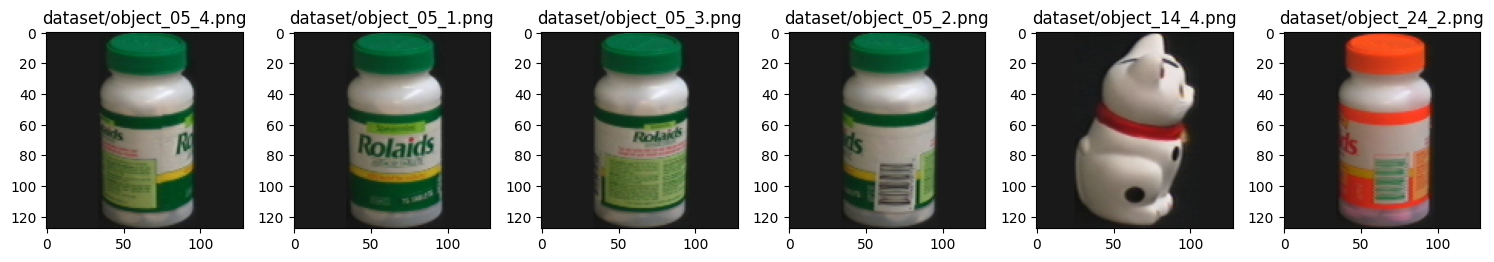

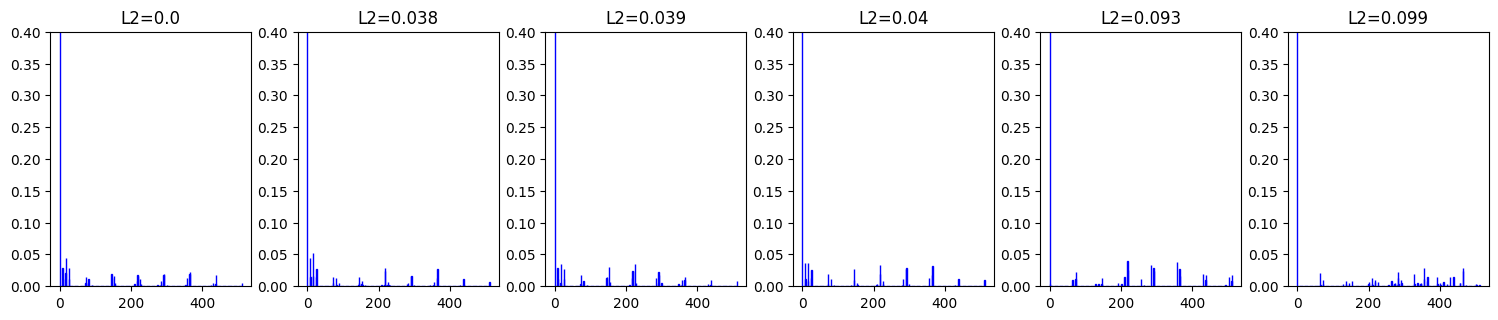

In [49]:
err, hists = ret_5("dataset/", image, 8, "L2")
err2 = err

plt.figure(figsize=(15, 10)) 
for idx, (image_path, e) in enumerate(err.items()):
    img = cv2.imread(image_path)
    plt.subplot(1, 6, idx+1) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    plt.title(image_path)
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6)) 
for idx, (image_path, e) in enumerate(err.items()):
    hist = hists[image_path]
    plt.subplot(2, 6, idx+7) 
    H = hist.reshape(-1)
    plt.bar(range(len(H)), H, edgecolor='blue')
    plt.ylim(0, 0.4)
    plt.title(f"L2={e}")
    
plt.tight_layout()
plt.show()

### (e)  Use the function plt.plot() to display image indices on the x axis and distances to the reference image on the y axis.

In [63]:
image = cv2.imread("dataset/object_05_4.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
err, hists = image_retrieval("dataset/", image, 8, "H")

In [64]:
err_values = list(err.values())


In [65]:
err_values_sorted = np.sort(err_values)

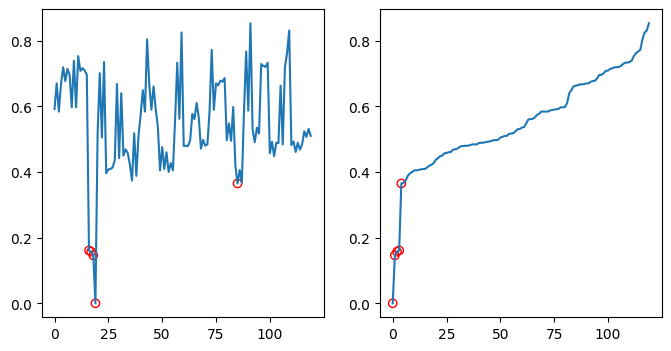

In [67]:

indices = range(len(err_values))
indices_sorted = range(len(err_values_sorted))

lowest_indices = np.argsort(err_values)[:5]

plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(range(len(err_values)), err_values, linestyle='-') 
plt.scatter(lowest_indices, [err_values[i] for i in lowest_indices], color='red', facecolors="none")
plt.subplot(1,2,2)
plt.plot(range(len(err_values_sorted)), err_values_sorted, linestyle='-') 
plt.scatter(range(5), [err_values_sorted[i] for i in range(5)], color='red',facecolors="none")
plt.show()

### (f) 

In [68]:
hists_sum = np.zeros(hists["dataset/object_05_4.png"].shape)

In [69]:
for image_path, hist in hists.items():
    hists_sum += hist
    

In [70]:
hists_sum1 = hists_sum.reshape(-1)

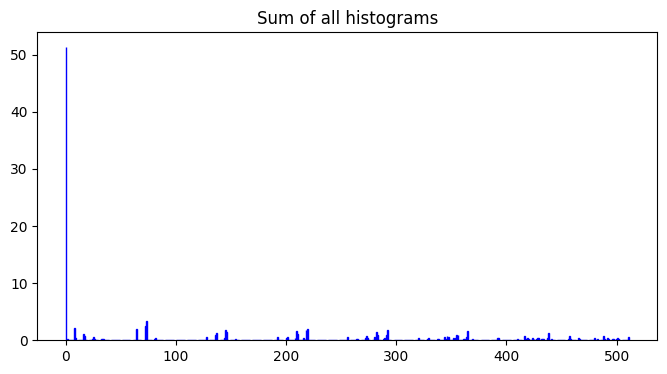

In [71]:
plt.figure(figsize=(8, 4)) 
plt.bar(range(len(hists_sum1)), hists_sum1, edgecolor='blue')
plt.title("Sum of all histograms")
plt.show()

In [72]:
w = np.zeros(hists_sum.shape)
lambda_ = 0.1


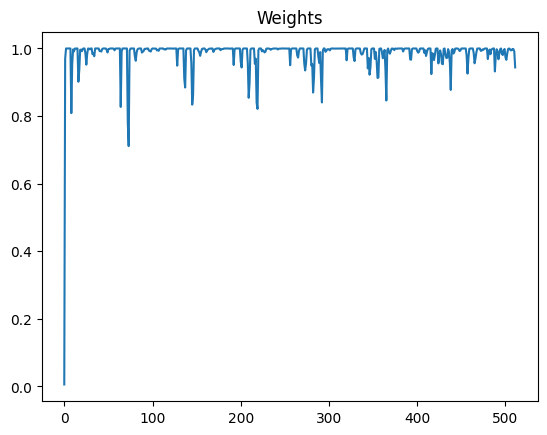

In [73]:
w = np.exp(-lambda_ * hists_sum)
plt.plot(w.reshape(-1))
plt.title("Weights")
plt.show()

In [74]:
w_hists = {}
for image_path, hist in hists.items():
    w_hists[image_path] = hist * w
    w_hists[image_path] /= np.sum(w_hists[image_path])

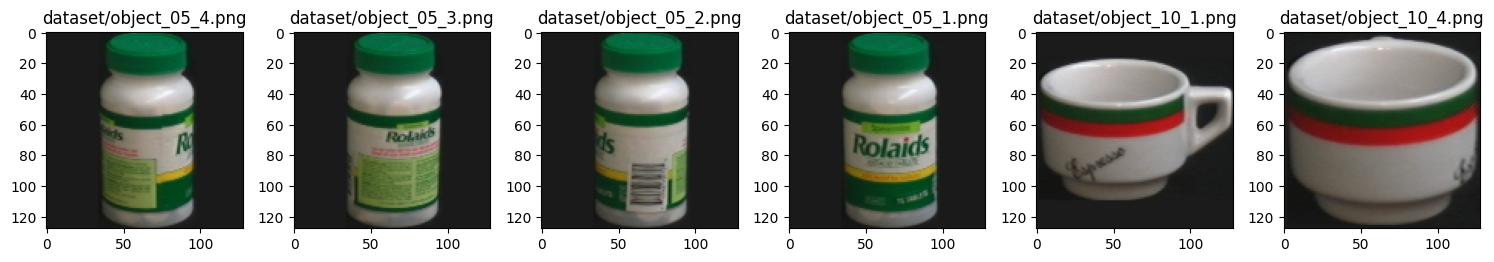

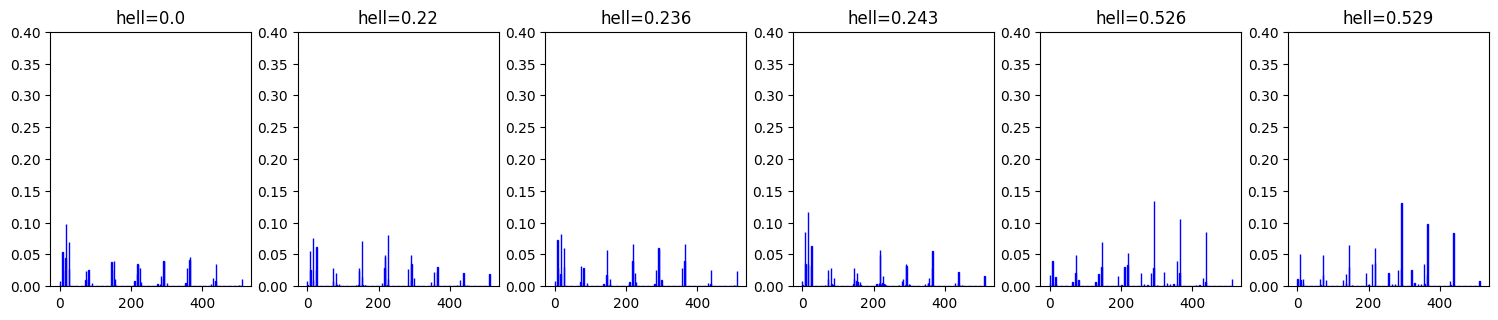

In [75]:
errors = {}

w_im_hist = w_hists["dataset/object_05_4.png"]

for image_path, hist in w_hists.items():
    e = compare_histograms(w_im_hist,hist,"H")
    errors[image_path] = e


sorted_errors = dict(sorted(errors.items(), key=lambda item: item[1]))
errors5 = {}
hists5 = {}
i = 0
for image_path, err in sorted_errors.items():
    errors5[image_path] = err
    hists5[image_path] = w_hists[image_path]
    i+=1
    if i == 6:
        break
        
plt.figure(figsize=(15, 10)) 
for idx, (image_path, e) in enumerate(errors5.items()):
    img = cv2.imread(image_path)
    plt.subplot(1, 6, idx+1) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    plt.title(image_path)
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6)) 
for idx, (image_path, e) in enumerate(errors5.items()):
    hist = hists5[image_path]
    plt.subplot(2, 6, idx+7) 
    H = hist.reshape(-1)
    plt.bar(range(len(H)), H, edgecolor='blue')
    plt.ylim(0, 0.4)
    plt.title(f"hell={e}")
    
plt.tight_layout()
plt.show()




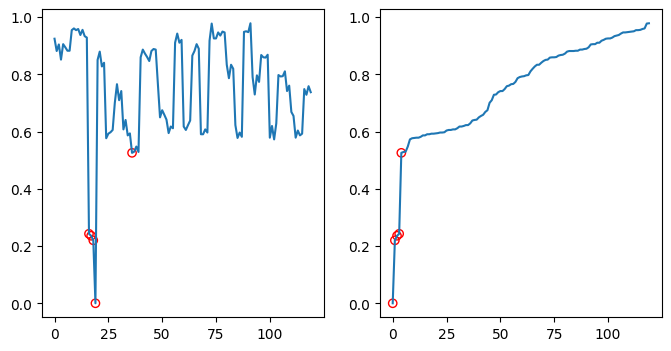

In [76]:
err_values = list(errors.values())
err_values_sorted = np.sort(err_values)
indices = range(len(err_values))
indices_sorted = range(len(err_values_sorted))

lowest_indices = np.argsort(err_values)[:5]

plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(range(len(err_values)), err_values, linestyle='-') 
plt.scatter(lowest_indices, [err_values[i] for i in lowest_indices], color='red', facecolors="none")
plt.subplot(1,2,2)
plt.plot(range(len(err_values_sorted)), err_values_sorted, linestyle='-') 
plt.scatter(range(5), [err_values_sorted[i] for i in range(5)], color='red',facecolors="none")
plt.show()